In [44]:
import pandas as pd 
import matplotlib.pyplot as plt ; 
import numpy as np
%matplotlib notebook
from math import sqrt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree   
from six import StringIO 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import linear_model
import pandas as pd
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import csv
import matplotlib.pyplot as plt
from sklearn import svm
from decimal import Decimal, ROUND_HALF_UP
from sklearn.svm import LinearSVC
import os
import seaborn as sns 
%matplotlib inline


In [45]:
os.chdir("C:/Users/gizem")

In [46]:
data = pd.read_csv('patient.csv' , encoding='windows-1252')


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95839 entries, 0 to 95838
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sex                     95839 non-null  int64 
 1   patient_type            95839 non-null  int64 
 2   intubated               95839 non-null  int64 
 3   pneumonia               95839 non-null  int64 
 4   age                     95839 non-null  int64 
 5   pregnant                95839 non-null  int64 
 6   diabetes                95839 non-null  int64 
 7   copd                    95839 non-null  int64 
 8   asthma                  95839 non-null  int64 
 9   immunosuppression       95839 non-null  int64 
 10  hypertension            95839 non-null  int64 
 11  other_diseases          95839 non-null  int64 
 12  cardiovascular          95839 non-null  int64 
 13  obesity                 95839 non-null  int64 
 14  chronic_kidney_failure  95839 non-null  int64 
 15  sm

In [48]:
data.corr()

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,deaths
sex,1.000000,0.104142,-0.104231,-0.041587,0.036508,0.995064,0.015488,0.017833,0.017779,0.014783,0.016326,0.019640,0.015451,0.016856,0.015694,0.011192,-0.016174,-0.045686,-0.104268,0.052972
patient_type,0.104142,1.000000,-0.999327,-0.263222,0.277913,0.103534,0.012617,0.020348,0.026499,0.025789,0.011135,0.039194,0.024838,0.022876,0.022190,0.024992,0.183498,-0.087532,-0.999299,0.282048
intubated,-0.104231,-0.999327,1.000000,0.263512,-0.278253,-0.103628,-0.012775,-0.020500,-0.026657,-0.025573,-0.011283,-0.039362,-0.024987,-0.023029,-0.022344,-0.025147,-0.183582,0.087906,0.999966,-0.282923
pneumonia,-0.041587,-0.263222,0.263512,1.000000,-0.103844,-0.041455,-0.001884,-0.004933,-0.007060,-0.007793,-0.001364,-0.014695,-0.007436,-0.005875,-0.005447,-0.006953,-0.033221,0.033883,0.263465,-0.108989
age,0.036508,0.277913,-0.278253,-0.103844,1.000000,0.035711,0.006527,0.019210,0.024390,0.023457,-0.002451,0.025646,0.021370,0.017958,0.024006,0.022067,0.046247,-0.072277,-0.278264,0.185163
pregnant,0.995064,0.103534,-0.103628,-0.041455,0.035711,1.000000,0.027024,0.030218,0.030095,0.026829,0.028412,0.029823,0.027337,0.028823,0.027718,0.022950,-0.015163,-0.047578,-0.103665,0.052960
diabetes,0.015488,0.012617,-0.012775,-0.001884,0.006527,0.027024,1.000000,0.869776,0.881200,0.858777,0.876861,0.749238,0.866721,0.809533,0.862719,0.837194,0.026889,-0.030232,-0.012740,0.006402
copd,0.017833,0.020348,-0.020500,-0.004933,0.019210,0.030218,0.869776,1.000000,0.918751,0.910085,0.893289,0.783647,0.903781,0.843663,0.900077,0.871733,0.032278,-0.036061,-0.020460,0.012222
asthma,0.017779,0.026499,-0.026657,-0.007060,0.024390,0.030095,0.881200,0.918751,1.000000,0.918711,0.897319,0.791514,0.912634,0.848370,0.914133,0.886042,0.034112,-0.037689,-0.026633,0.014577
immunosuppression,0.014783,0.025789,-0.025573,-0.007793,0.023457,0.026829,0.858777,0.910085,0.918711,1.000000,0.891359,0.791973,0.906272,0.848535,0.903133,0.877877,0.033583,-0.033387,-0.025190,0.017316


<AxesSubplot:>

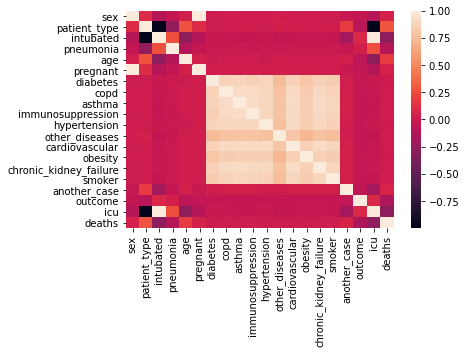

In [49]:
sns.heatmap(data.corr())

In [50]:
plt.close()

In [51]:
data.corr().nlargest(11,'deaths').index  

Index(['deaths', 'patient_type', 'age', 'another_case', 'sex', 'pregnant',
       'smoker', 'immunosuppression', 'cardiovascular', 'other_diseases',
       'asthma'],
      dtype='object')

<AxesSubplot:xlabel='age'>

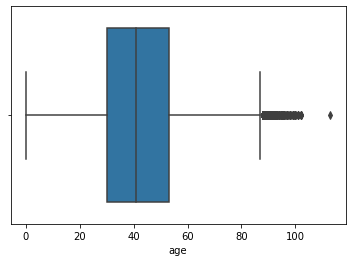

In [52]:
sns.boxplot(x=data['age'])


In [53]:
data = data.drop(data.index[data['age'] >= 110])


In [54]:
y = data['deaths']
X = data[[ 'patient_type', 'age', 'another_case', 'sex', 'pregnant',
       'smoker', 'immunosuppression', 'cardiovascular', 'other_diseases','asthma']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X

,patient_type,age,another_case,sex,pregnant,smoker,immunosuppression,cardiovascular,other_diseases,asthma
0,1,42,99,2,97,2,2,2,2,1
1,1,51,99,1,2,2,2,2,2,2
2,2,51,99,2,97,2,2,2,2,2
3,2,57,99,2,97,2,2,2,2,2
4,2,44,2,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
95834,2,59,99,2,97,2,2,2,2,2
95835,2,50,99,2,97,2,1,2,2,2
95836,2,65,99,1,2,2,2,2,2,2
95837,1,48,1,1,2,2,2,2,2,2


In [56]:
y_train

15214    0
8978     0
62058    0
44833    0
14267    0
        ..
6265     0
54887    0
76821    0
860      0
15795    0
Name: deaths, Length: 76670, dtype: int64

In [57]:
#y = data['deaths']
#X = data[[ 'obesity', 'age', 'hypertension', 'sex', 'chronic_kidney_failure',
 #      'smoker', 'asthma', 'cardiovascular', 'diabetes','pneumonia']]


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
tre = tree.DecisionTreeClassifier()
tre = tre.fit(X_train, y_train)
acc_tree = tre.score(X_test , y_test) * 100
acc_tree

95.93593489148581

In [59]:
accuracymean=cross_val_score(estimator=tre,X=X_train,y=y_train,cv=5)
print(accuracymean.mean()*100)


95.967131863832


In [60]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc_gnb = gnb.score(X_test , y_test) * 100
acc_gnb

95.68551752921536

In [61]:
accuracymean=cross_val_score(estimator=gnb,X=X_train,y=y_train,cv=5)
print(accuracymean.mean()*100)


95.88104865005869


In [62]:
svm =SVC()
svm.fit(X_train, y_train)
acc_svm = svm.score(X_test , y_test) * 100 
acc_svm

96.26982470784641

In [63]:
accuracymean=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=5)
print(accuracymean.mean()*100)


96.45232815964523


In [64]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
acc_lr = lr.score(X_test, y_test) * 100
acc_lr


96.26982470784641

In [65]:
accuracymean=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=5)
print(accuracymean.mean()*100)


96.4484152862919


In [66]:

acc_svm1 = round(acc_svm,4)
acc_tree1 = round(acc_tree,4)
acc_gnb1 = round(acc_gnb,4)
acc_lr1= round(acc_lr,4)

print(acc_svm1)
print(acc_tree1)
print(acc_gnb1)
print(acc_lr1)



96.2698
95.9359
95.6855
96.2698


In [67]:
# Plotting Accuracy
accuracy = [acc_svm1, acc_tree1, acc_gnb1,  acc_lr1 ]
names = ["SVM","Decision Tree", "Naive Bayes", "Logistic R"]



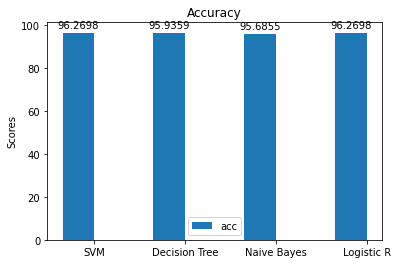

In [68]:





x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='acc')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)



plt.show()

In [69]:
plt.close()

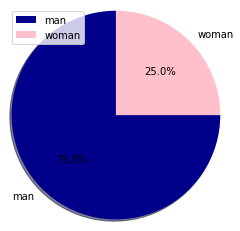

In [70]:
# Plotting Gender
man = []
woman = []
sex = np.array(data["sex"])
for a in range(len(x)):
    if sex[a] == 1:
        woman.append("1")
    else:
        man.append("2")

list_lenght1 = len(man)
list_lenght2 =len(woman)

# defining labels
activities = ['man', 'woman']

# portion covered by each label
slices = [list_lenght1, list_lenght2]

# color for each label
colors = ['darkblue', 'pink']

# plotting the pie chart
plt.pie(slices, labels=activities, colors=colors,
        startangle=90, shadow=True, explode=(0, 0),
        radius=1.2, autopct='%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()

In [71]:
plt.close()

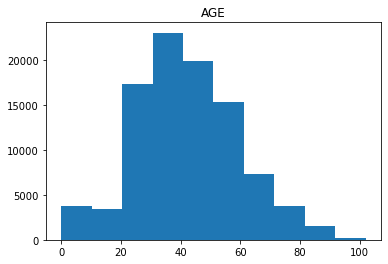

In [72]:
# Plotting Age
age = np.array(data["age"])
plt.hist(age, bins = 10)
plt.title('AGE')
plt.show()

In [73]:
plt.close()

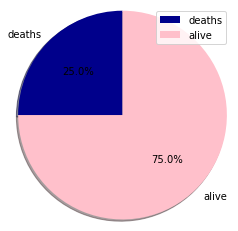

In [74]:
# Plotting Result
ded = []
ali = []
patients = np.array(data["deaths"])

for a in range(len(x)):
    if patients[a] == 1:
        ded.append("1")
    else:
        ali.append("0")

list_lenght11 = len(ded)
list_lenght22 =len(ali)

# defining labels
activities = ['deaths', 'alive']

# portion covered by each label
slices = [list_lenght11, list_lenght22]

# color for each label
colors = ['darkblue', 'pink']

# plotting the pie chart
plt.pie(slices, labels=activities, colors=colors,
        startangle=90, shadow=True, explode=(0, 0),
        radius=1.2, autopct='%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()

In [75]:
predictions = tre.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(20)
pred.head(20)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
